**(a) Generate two-dimensional training data and test data coming from two classes.**

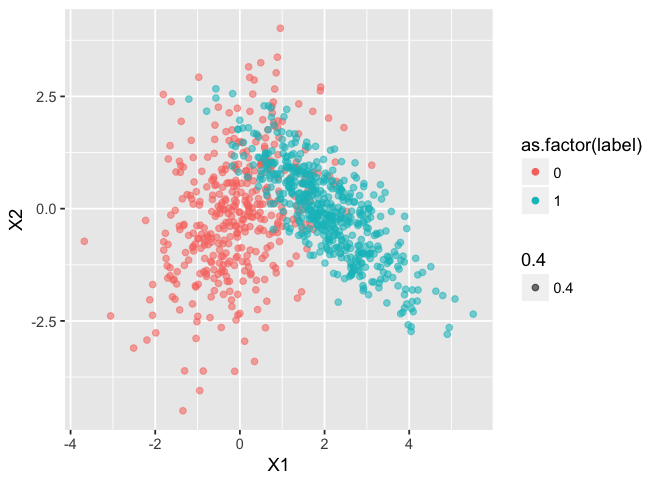

In [37]:
library(MASS)
library(caret)
library(grid)
library(repr)

# Change plot size
options(repr.plot.width=5.5, repr.plot.height=4)

#generate and plot sample data from two classes
Sigma = matrix(c(1,0.5,0.5,2),2,2,)
mu = c(0,0)
Sigma2 = matrix(c(1,-0.8,-0.8,1),2,2,)
mu2 = c(2,0)

set.seed(820)
s1 = mvrnorm(n = 400, mu, Sigma)
s2 = mvrnorm(n = 500, mu2, Sigma2)
data = data.frame(rbind(s1, s2), label = c(rep(0, 400), rep(1, 500)))
ggplot(data, aes(x = X1, y = X2, col = as.factor(label))) + geom_point(aes(alpha=0.4))

#split into training and testdata
inTrainingSet <- createDataPartition(data[,3], p = 0.8, list=FALSE)
train <- data[inTrainingSet,]
test <- data[-inTrainingSet,]


**(b) Run the algorithm.**

In [38]:
#define algorithm
kNN_predict = function(train, point, k){
 
  tpm = cbind(rep(point[[1]], nrow(train)), rep(point[[2]], nrow(train)))
  train
  tpm
  dists <- sqrt(rowSums((train[,1:2] - tpm)^2))
  head(dists)
  kmins = sort(dists, FALSE)[1:k]
  score = mean(train[which(dists %in% kmins),3])
  if(score == 0.5 & mean(train$label) != 0.5){
    return(round(mean(train$label)))
  }else{
    return(round(score))
    }
}

In [39]:
#run algorithm on testset for k = 3
k = 3
y_hat = vector(length = nrow(test))
for(i in 1:nrow(test)){
  y_hat[i] = kNN_predict(train, test[i,], k)
}

results = data.frame(test, correct_classified = test[,3] == y_hat)

#print loss function
print(mean(y_hat == test[,3]))


[1] 0.8111111


**(c) Plot the result as a 2D figure. Use colors (or shapes) to illustrate the results.**

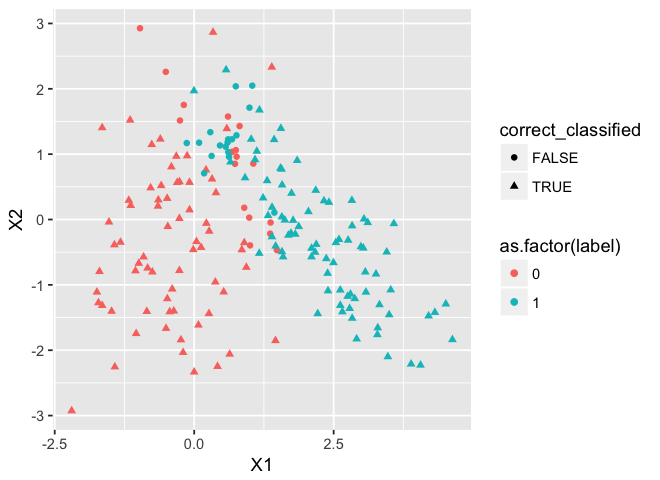

In [40]:
ggplot(results, aes(x=X1, y = X2, col = as.factor(label), group = correct_classified )) + geom_point(aes(shape = correct_classified))



**(d) Find the KNN decision boundary (i.e. where is the boundary where the algorithm de- cides for either class 1 or class 2) and plot it.**

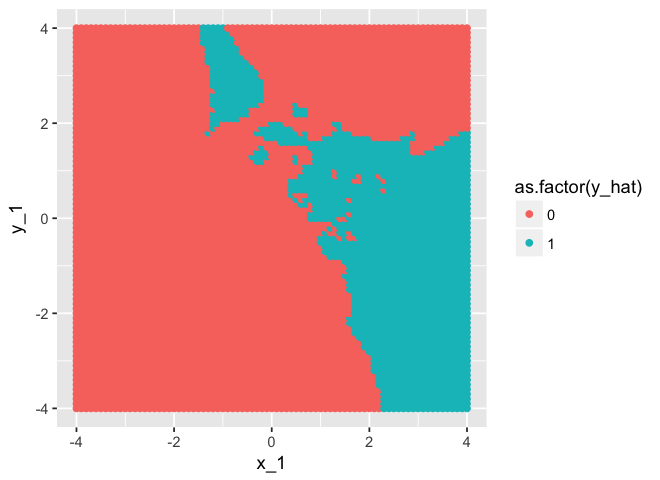

In [41]:
#estimate decision boundary using a data points grid
resolution = 1/10
times = length(seq(-4,4,resolution))
x_1 = rep(seq(-4,4,resolution), times)
y_1 = lapply(seq(-4,4,resolution), function(x) rep(x, times))
y_1 = unlist(y_1)
t = cbind(x_1, y_1)

y_hat = vector(length = nrow(t))
for(i in 1:nrow(t)){
  y_hat[i] = kNN_predict(train, t[i,], k)
}

res2 = data.frame(t, y_hat)
ggplot(res2, aes(x=x_1, y = y_1, col = as.factor(y_hat))) + geom_point()

**e) Repeat your experiment for different K.**

In [42]:
ks = c(1,3,5,11,21,31,41,61,81)
results = list()
plotlist = list()

for(k in 1:length(ks)){
  for(i in 1:nrow(t)){
    y_hat[i] = kNN_predict(train, t[i,], ks[k])
  }
results[[k]] = data.frame(t, y_hat)
plotlist[[k]] = ggplot(results[[k]], aes(x=x_1, y = y_1, col = as.factor(y_hat))) + geom_point()
    
}

In [43]:
multiplot <- function(..., plotlist = NULL, file, cols = 1, layout = NULL) {
  require(grid)

  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                 ncol = cols, nrow = ceiling(numPlots/cols))
}

if (numPlots == 1) {
print(plots[[1]])

} else {
grid.newpage()
pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

for (i in 1:numPlots) {
  matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

  print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                  layout.pos.col = matchidx$col))
 }
}
 }

Multiplot source: https://stackoverflow.com/questions/24387376/r-weird-error-could-not-find-function-multiplot

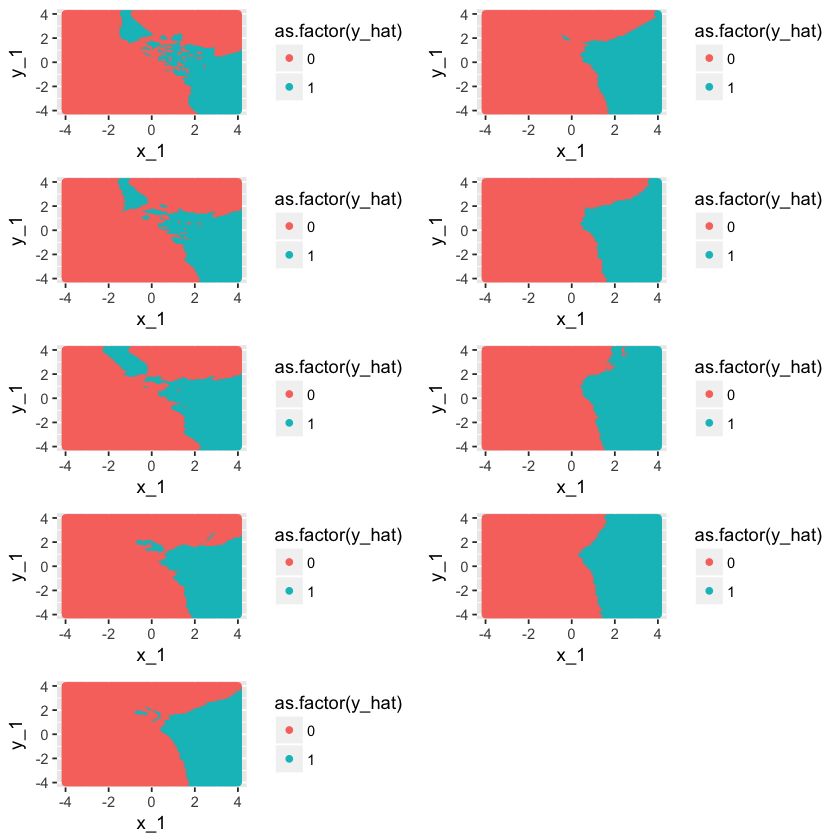

In [44]:
options(repr.plot.width=7, repr.plot.height=7)
multiplot(plotlist = plotlist, cols = 2)

**How does the KNN decision boundary behave?**
<br>The decision boundry gets smoother (=shorter compared to the area). The areas in which a point gets assigned to a certain label gets more compact. That is because for smaller k the algorithm is more sensitive for single data points while the boundries move closer to the training data means for higher k.

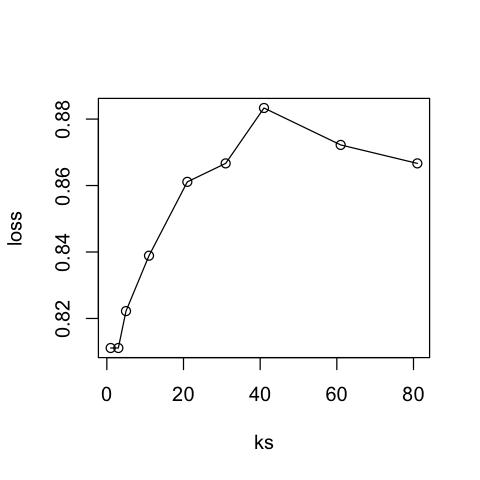

In [45]:
options(repr.plot.width=4, repr.plot.height=4)
loss = vector()
for(k in ks){
  y_hat = vector(length = nrow(test))
  for(i in 1:nrow(test)){
    y_hat[i] = kNN_predict(train, test[i,], k)
  }
  loss = c(loss,mean(y_hat == test[,3]))
}

plot(loss~ks)
lines(loss~ks)


**What is the best K and why? Hint: Compute the empirical loss for different k. Use the indicator loss function for this. Plot the loss versus k. What do you observe?**<br>The results of the loss function over multiple k show that the best classification rate is reached for k round about 40. For higher k the rate decreases again.